In [1]:
import matplotlib.pyplot as plt

import numpy as np
from scipy import optimize

import time

from datetime import datetime
from time import mktime

from scipy.optimize import curve_fit, least_squares

In [2]:
def model(params, x):
    """[summary]

    Args:
        params ([type]): [description]
        x ([type]): [description]
    """
    a, b, lam = params
    ypred = a * (1 - b * np.exp(-x/lam))
    return ypred


def error_func(params, x, y):
    """Least squares error function

    Args:
        x ([type]): [description]
        a ([type]): [description]
        b ([type]): [description]
        c ([type]): [description]
    """
    ypred = model(params, x)
    return np.abs(ypred - y)


def get_times(timestamps):
    """Get the time stamps in seconds.

    Args:
        timestamps (list): A list of unix time stamps
    
    Returns:
        times (list): A list of times starting from 0 in seconds
    """
    times = [time.gmtime(td) for td in timestamps]
    dt = [datetime.fromtimestamp(mktime(struct)) for struct in times]
    diff = np.array([(dt[i] - dt[0]).total_seconds() for i in range(1, len(dt))])

    # start from 0 and add the differences to make the list of times (in s)
    return np.concatenate([[2], diff])



In [115]:
I = 0.00316*1e-3
deltaT = 8.90*1e-3

P = (I**2)*120

"{:e}".format(deltaT/P)

# I = 1*1e-3
# deltaT = 2.32*1e-3

# P = (I**2)*120

# # (deltaT/P)
# "{:e}".format(deltaT/P)

'7.427362e+06'

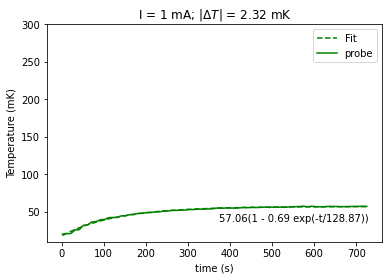

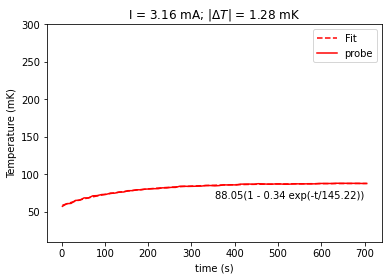

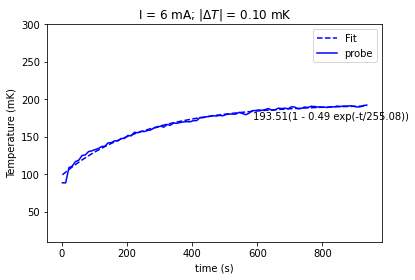

In [3]:
dt = 10

colors = ["r", "b", "g"]
fnames = [7, 8, 9]
currents = [1, 3.16, 6] #mA

for i, idx in enumerate(fnames):
    datafile_path = 'temperature_measurement_T(P)_09_2021-10-20-Sweep0{}.txt'.format(str(idx))
    data = np.loadtxt(datafile_path)

    tprobe = data[:, -1]*1e3
    tmixer = data[:, -2]*1e3

    tlist = get_times(data[:, -3])

    plt.title(r"I = {} mA; |$\Delta T$| = {:.2f} mK".format(currents[i], np.abs(tprobe[-1] - tmixer[-1])))


    plt.xlabel("time, t (s)")
    plt.ylabel("Temperature (mK)")



    x = tlist
    y = tprobe

    x0 =  [y[-1], y[-1]/2, (x[-1] - x[0])/2]
    res = least_squares(error_func,
                    x0, args=[x, y])
    ypred = model(res.x, x)

    plt.plot(x, ypred, "--", color=colors[i-1], label='Fit')
    plt.text(x[-1] -350 , y[-1]-20, "{:.2f}(1 - {:.2f} exp(-t/{:.2f}))".format(*res.x))


    plt.plot(x, y, color=colors[i-1], label="probe")

    plt.ylim(10, 300)

    plt.xlabel("time (s)")
    plt.ylabel("Temperature (mK)")
    plt.legend()
    plt.show()

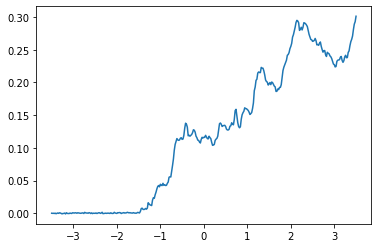

In [169]:
datafile_path = 'datafile2021-10-20grp_9_sample_9.txt'
# datafile_path = 'datafile2021-10-20freq_7.txt'
data = np.loadtxt(datafile_path)


e = 1.60217662 * 10**(-19)
h = 6.62607004 * 10**(-34)
scaling = 2*e**2/h

xdata = (data[:, 0]*1e-3)  # volts
ydata = -data[:, 3]*1e-6/(0.5*1e-5)

ydata = ydata/scaling



plt.plot(xdata, ydata)
# vth is the value at which y = 0
pinch_off_index = np.argwhere(ydata > 0.005)[0][0]
pinch_off_index

xdata[pinch_off_index+200]
vth = xdata[pinch_off_index]
# pinch_off_index

In [170]:
# only consider the positive voltage  (linear part)
# idx = np.sort(np.argwhere(xdata > 0).ravel())
x = xdata[pinch_off_index:pinch_off_index+200]
y = ydata[pinch_off_index:pinch_off_index+200]

In [171]:
# fit
m, c = np.polyfit(x, y, 1)

Text(0, 0.5, 'G(2$e^2/h$)')

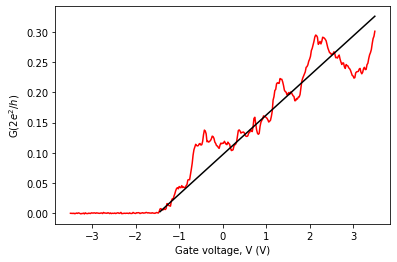

In [172]:
plt.plot(xdata, ydata, c="r")
plt.plot(np.linspace(x[0], xdata[-1]), m*np.linspace(x[0], xdata[-1]) + c -0.015, c="k") # adjusting for a better intercept
# plt.vlines(vth, 0, 0.005, color="k")
plt.xlabel("Gate voltage, V (V)")
plt.ylabel(r"G(2$e^2/h$)")

In [173]:
print(m, vth)

0.06544798159613337 -1.4399938964


In [241]:
k = 9
epsilon = 8.8541878128*1e-12

L = (2/3)*1e-4 # in cm
A = L*L/2
d = 20*1e-9


C = (k*epsilon*A/d)

print(C/1e-18)

8854187.812799998


In [242]:
mobility = (m*L**2/C)

In [243]:
mobility

32.85224171374912